# Understanding the local electricity market

## 📖 Background
You work for an energy company in Australia. Your company builds solar panel arrays and then sells the energy they produce to industrial customers. The company wants to expand to the city of Melbourne in the state of Victoria. 

Prices and demand for electricity change every day. Customers pay for the energy received using a formula based on the local energy market's daily price.

Your company's pricing committee wants your team to estimate energy prices for the next 12-18 months to use those prices as the basis for contract negotiations.

In addition, the VP of strategy is researching investing in storage capacity (i.e., batteries) as a new source of revenue. The plan is to store some of the energy produced by the solar panels when pricing conditions are unfavorable and sell it by the next day on the open market if the prices are higher.

## 💾 The data
You have access to over five years of energy price and demand data ([source](https://www.kaggle.com/aramacus/electricity-demand-in-victoria-australia)):

- "date" - from January 1, 2015, to October 6, 2020.
- "demand" - daily electricity demand in MWh.
- "price" - recommended retail price in AUD/MWh.
- "demand_pos_price" - total daily demand at a positive price in MWh.
- "price_positive" - average positive price, weighted by the corresponding intraday demand in AUD/MWh.
- "demand_neg_price" - total daily demand at a negative price in MWh.
- "price_negative" - average negative price, weighted by the corresponding intraday demand in AUD/MWh.
- "frac_neg_price" - the fraction of the day when the demand traded at a negative price.
- "min_temperature" - minimum temperature during the day in Celsius.
- "max_temperature" - maximum temperature during the day in Celsius.
- "solar_exposure" - total daily sunlight energy in MJ/m^2.
- "rainfall" - daily rainfall in mm.
- "school_day" - "Y" if that day was a school day, "N" otherwise.
- "holiday" - "Y" if the day was a state or national holiday, "N" otherwise.

Note: The price was negative during some intraday intervals, so energy producers were paying buyers rather than vice-versa.

In [1]:
import pandas as pd
df = pd.read_csv('./data/energy_demand.csv', parse_dates=['date'])
df.head()

,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


## 💪 Competition challenge

Create a report that covers the following:

1. How do energy prices change throughout the year? Are there any patterns by season or month of the year?
2. Build a forecast of daily energy prices the company can use as the basis of its financial planning.
3. Provide guidance on how much revenue the energy storage venture could generate per year using retail prices and a 70MWh storage system.

In [2]:
df.isna().sum()

date                0
demand              0
price               0
demand_pos_price    0
price_positive      0
demand_neg_price    0
price_negative      0
frac_neg_price      0
min_temperature     0
max_temperature     0
solar_exposure      1
rainfall            3
school_day          0
holiday             0
dtype: int64

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## **IMPORTING ALL NECESSARY LIBRARIES**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## **DATA PREPARATION**

First, let's see information about the data and it's descriptive statistics.

In [4]:
data = df.copy()

print("------------------------------------------------------------------------------")
print("INFORMATION")
print("------------------------------------------------------------------------------")
print(data.info())
print()
print("------------------------------------------------------------------------------")
print("DESCRIPTIVE STATISTICS")
print("------------------------------------------------------------------------------")
print(data.describe().T)

------------------------------------------------------------------------------
INFORMATION
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2106 non-null   datetime64[ns]
 1   demand            2106 non-null   float64       
 2   price             2106 non-null   float64       
 3   demand_pos_price  2106 non-null   float64       
 4   price_positive    2106 non-null   float64       
 5   demand_neg_price  2106 non-null   float64       
 6   price_negative    2106 non-null   float64       
 7   frac_neg_price    2106 non-null   float64       
 8   min_temperature   2106 non-null   float64       
 9   max_temperature   2106 non-null   float64       
 10  solar_exposure    2105 non-null   float64       
 11  rainfall        

Alright, we can see some columns are shorter than others, that means we have NaNs in these cells. We have to remove them from our dataset to make it equal.
We have also 2 object type data, we should change it to dummies.

Also we can see desriptive statistics.

Let's drop empty cells.

In [5]:
data = data.dropna()
data

,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


Here we create dummie variables of school_day and holiday

In [6]:
dummies = pd.get_dummies(data, columns=['school_day', 'holiday'], drop_first=True)
dummies

,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day_Y,holiday_Y
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0,1
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,0,0
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0,0
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,0,0
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,0,0
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,0,0
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,0,0
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,0,0


Now after preparing our Dataset for analysis we should asses which columns/variables here are usefull for our task.
Let's think a bit.

**How do energy prices change throughout the year? Are there any patterns by season or month of the year?**

Well, to answer this question we need to see plots of energy price and date. Nothing more it seems.
To do so I will use price_positive plot, then negative_price. And at last I will plot price, which is recomended price for this reagion and demand.

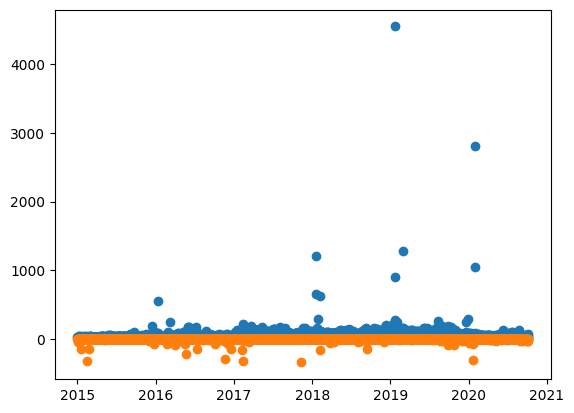

In [7]:
plt.scatter(x=dummies['date'], y=dummies['price'])
plt.scatter(x=dummies['date'], y=dummies['price_negative'])
plt.show()

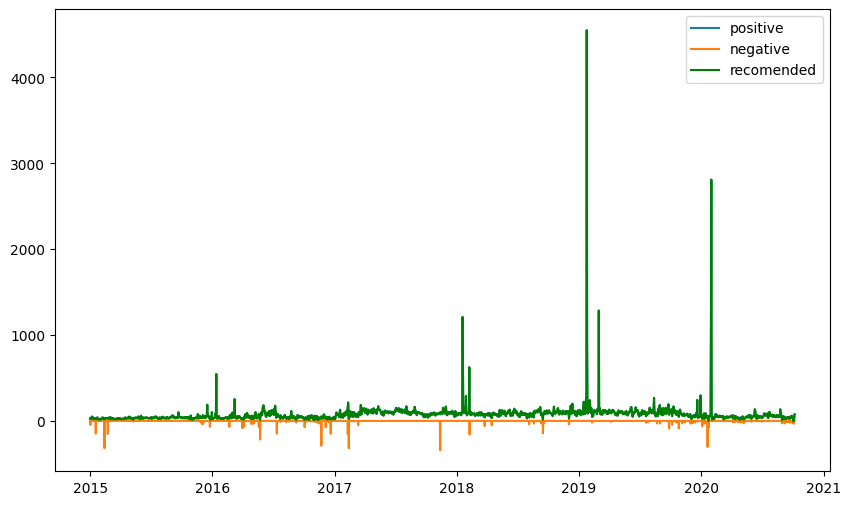

In [8]:
fig = plt.figure(figsize=(10, 6))
_ = plt.plot(dummies['date'], dummies['price_positive'], label='positive')
_ = plt.plot(dummies['date'], dummies['price_negative'], label='negative')
_ = plt.plot(dummies['date'], dummies['price'], label='recomended', c='g')
plt.legend()
plt.show()

Ok, this chart up here shows us how price changed since 2015 yo 2021. We can also see that recomended price is exactly the same thing as positive price, so we can treat them equaly.

There are four moments when we can see drastic growth of price, but still it doesn't help us in our analysis. 
These drastic moves could be casued by some crisises or other economical/political events we can not predict, so it would be good to remove it from our analysis and focus only on these moments when price was behaving "normally".

This kind of data I've mentioned before are called **outliers**, in the nest step I will replace them with something what won't cause any influence on our model.

To deal with outliers I will use z-score to identify it first. Then I will replace it with mean.
Let's go!

In [9]:


def z_score(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  outlier = []
  for i in data:
    z = (i-mean)/std
    if z > threshold:
      outlier.append(i)
      
  return outlier



In [10]:


z_score(dummies['price'])
mean = dummies['price'].mean()

for i in dummies['price']:
  if i in z_score(dummies['price']):
    dummies['price'] = dummies['price'].replace([i], mean)
  

z_score(dummies['price_positive'])
mean_n = dummies['price_positive'].mean()

for i in dummies['price_positive']:
  if i in z_score(dummies['price_positive']):
    dummies['price_positive'] = dummies['price_positive'].replace([i], mean_n)  




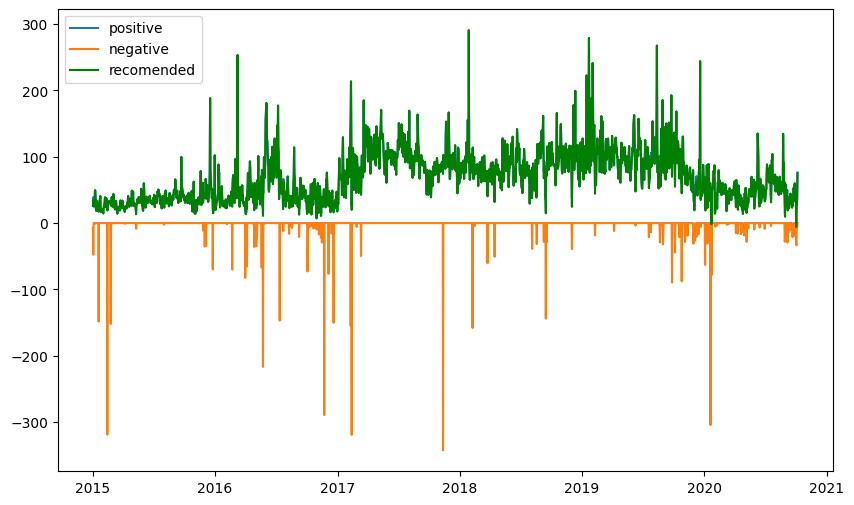

In [11]:
fig = plt.figure(figsize=(10, 6))
_ = plt.plot(dummies['date'], dummies['price_positive'], label='positive')
_ = plt.plot(dummies['date'], dummies['price_negative'], label='negative')
_ = plt.plot(dummies['date'], dummies['price'], label='recomended', c='g')
plt.legend()
plt.show()

Now we can see our time series. We can say that after removing outliers their look improved, but if we want to make predictions, we need stationary time series. 

Now we have to differate our time series to make it look like stationary one.
First I will assign price and price_negative to new variables pos and neg, then I will make differentation of these variables.

In [12]:
pos = dummies[['date', 'price']].set_index('date')
neg = dummies[['date', 'price_negative']].set_index('date')

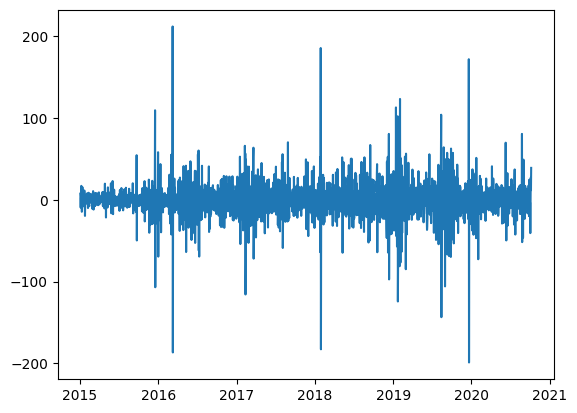

In [13]:
pos_ = pos.diff(1).dropna()

plt.plot(pos_)

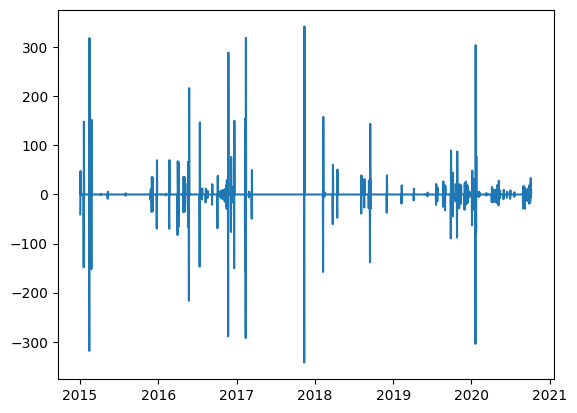

In [14]:
neg_ = neg.diff(1).dropna()
plt.plot(neg_)

Now our time series looks much better. We can move to the next step now.

In the next step I will make seasonal decomposition, to see seasonal relations of our time series.

In [17]:
pos_['price']

date
2015-01-02     7.505291
2015-01-03     1.425867
2015-01-04    -9.559295
2015-01-05     1.718616
2015-01-06     4.558134
                ...    
2020-10-02   -40.730699
2020-10-03     4.092558
2020-10-04    26.992084
2020-10-05    11.756087
2020-10-06    39.006358
Name: price, Length: 2101, dtype: float64

In [ ]:
pos_.index.freq

AttributeError: 'Int64Index' object has no attribute 'freq'

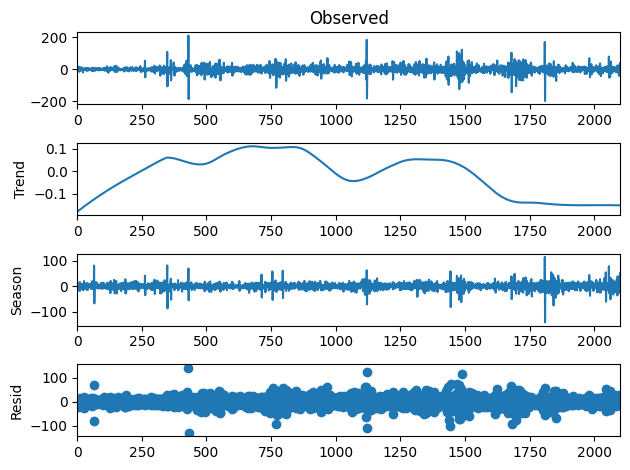

In [29]:
from statsmodels.tsa.seasonal import STL



stl = STL(pos_, period=365)
decomp = stl.fit()
fig = decomp.plot()



Mehh, this one is not pretty. We can't say what kind of time series we are dealing, it's also difficult to say anything.
We can see sum jumping of price but still I am not so sure about it. 

Let's see if our time series meets assumptions.

## **STATIONARITY TEST**

To examine stationarity I will use KPSS test and ADF test.

In [30]:


print(sm.tsa.stattools.kpss(pos_))
print()
print(sm.tsa.stattools.adfuller(pos_))



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07129968915616987, 0.1, 187, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

(-13.773732491215782, 9.575893151962187e-26, 26, 2074, {'1%': -3.433506900677679, '5%': -2.8629345760724205, '10%': -2.5675124080943377}, 18433.92316138088)


KPSS p_value: 0.1
ADF p_value: 9.575893151962187e-26

both KPSS and ADF say that our time seeries is stationary.
Now we can check if there is autocorrelation

## **AUTOCORRELATION TEST**

To test autocorrelation I will make ACF and PACF charts.


Figure(640x480)


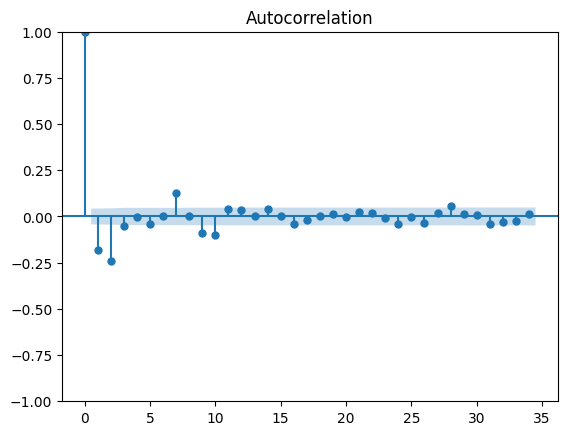

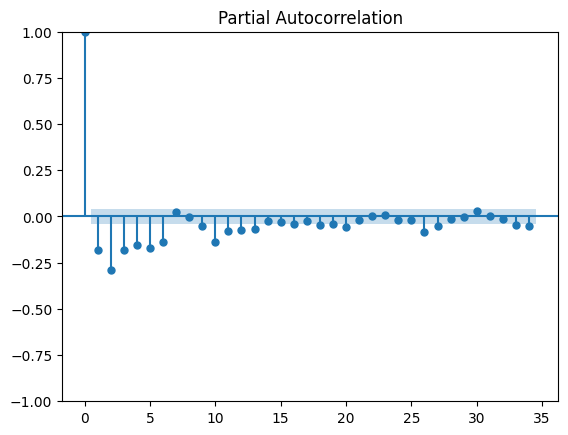

In [31]:


sm.graphics.tsa.plot_acf(pos_)
print()
print(sm.graphics.tsa.plot_pacf(pos_))



We can see ACF shows 2nd degree autocorrelation and PACF shows 6th degree.
We will decide later which degree is optimal for our time series.



## **MODEL**

In [33]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 54.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 91.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 108.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 135.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 70.2 MB

In [34]:
import pmdarima

auto = pmdarima.auto_arima(pos_, information_criterion="aicc", stationary=True, max_d=2, m=12, seasonal = False, maxd=2, trace=True)
print(auto.summary())

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AICC=18691.392, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AICC=19206.834, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AICC=19136.856, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AICC=18998.915, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AICC=19204.832, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AICC=18689.751, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AICC=18707.796, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AICC=18714.932, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AICC=18688.695, Time=1.80 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AICC=18691.677, Time=0.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AICC=18687.798, Time=2.97 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AICC=18688.696, Time=2.63 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AICC=18679.078, Time=4.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AICC=18687.274, Time=4.12 sec
 ARI

It seems SARIMAX(3, 0, 4) is optimal for this time series. Let's see diagnostics.

<Figure size 900x1200 with 0 Axes>

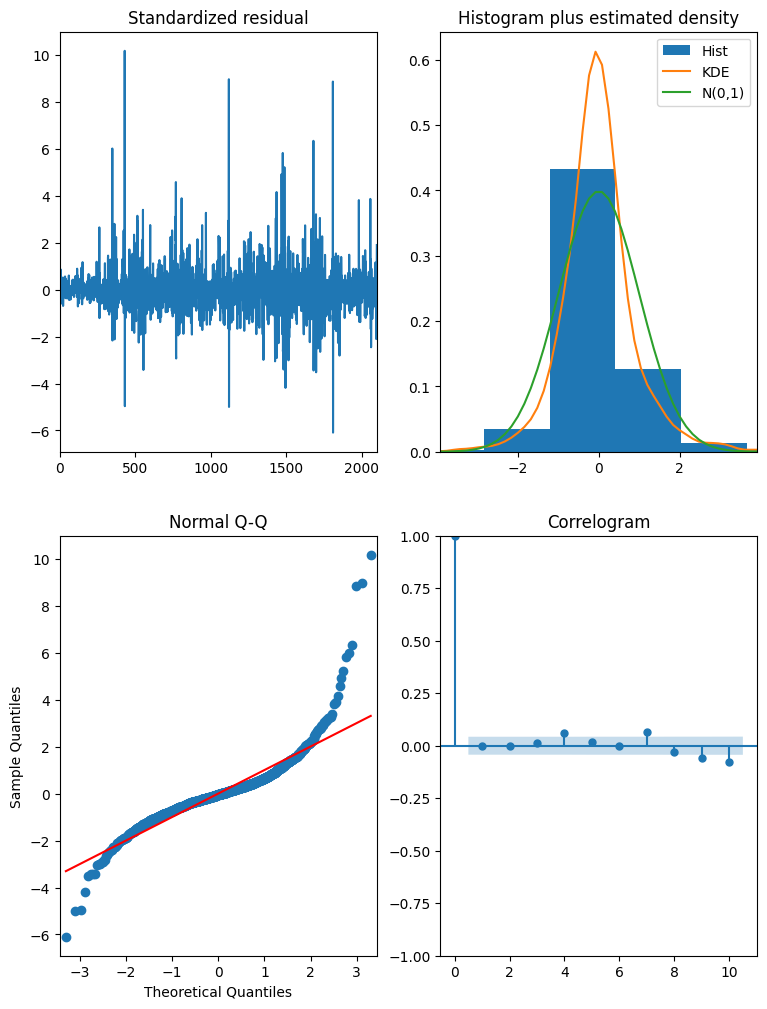

In [35]:


figure = plt.figure(figsize=(9, 12))
_ = auto.plot_diagnostics(figsize=(9,12))
plt.show()



It seems there is everything good, there is no aoutocorrelation of residuals, distribution is normal, but a little assymetric. Let's look at predictions.

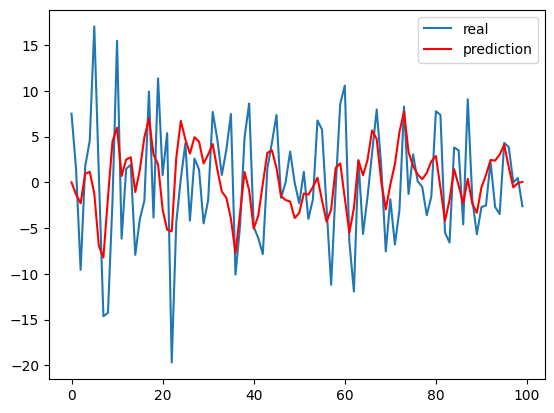

In [40]:


in_sample = auto.predict_in_sample(pos_)
pred = in_sample
pred.columns = ['price']

real = plt.plot(pos_[:100], label='real')
pred_ = plt.plot(pred[:100], label='prediction', c='r')
plt.legend()
plt.show()



Ok!


It seems we did it. I know it is not perfect, but we cannot predict everything.
Im just thinking, maybe we can do something about this heteroskedascity, maybe WLS estimator would be better here.
Let's see!